In [1]:
greetings = "Assalam-o-Alaikum!"
print(greetings)

Assalam-o-Alaikum!


### Import Libraries

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [68]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

### Import Dataset

In [3]:
df = pd.read_csv("jeopardy.csv")
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


### Data Information

In [4]:
# Data details
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216930 entries, 0 to 216929
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   Show Number  216930 non-null  int64 
 1    Air Date    216930 non-null  object
 2    Round       216930 non-null  object
 3    Category    216930 non-null  object
 4    Value       216930 non-null  object
 5    Question    216930 non-null  object
 6    Answer      216928 non-null  object
dtypes: int64(1), object(6)
memory usage: 11.6+ MB


In [5]:
# Data Columns
df.columns

Index(['Show Number', ' Air Date', ' Round', ' Category', ' Value',
       ' Question', ' Answer'],
      dtype='object')

In [6]:
# Rename Misformatted Columns
df = df.rename(columns = {" Air Date": "Air Date", " Round": "Round", " Category": "Category", " Value": "Value", " Question": "Question", " Answer": "Answer"})

**Adding a new column. If the value of the float column is not "None", then we cut off the first character (which is a dollar sign), and replace all commas with nothing, and then cast that value to a float. If the answer was "None", then we just enter a 0.**

In [7]:
df["Value"] = df["Value"].apply(lambda x: float(x[1:].replace(',','')) if x != "None" else 0)

### Data Analysis

**Top Show Questions by Frequencies**

In [8]:
snq = df["Show Number"].value_counts().to_frame().reset_index()
snq.columns = ["Show Number", "Questions"]
snq = snq["Questions"].value_counts().to_frame().reset_index().head(10)
snq.columns = ["TV Show Questions", "Frequency"]
snq.sort_values(by = "TV Show Questions", ascending = False)

,TV Show Questions,Frequency
0,61,2193
2,60,341
1,59,362
3,58,260
4,57,157
5,56,104
6,55,69
7,54,48
8,53,22
9,52,17


**Top Questions by Past Dates**

In [10]:
qd = df["Air Date"].value_counts().to_frame().reset_index().sort_values(by = "index").head(10)
qd.columns = ["Date", "Questions"]
qd

,Date,Questions
3610,1984-09-10,48
3600,1984-09-11,50
3586,1984-09-12,51
3537,1984-09-13,53
3508,1984-09-14,54
3422,1984-09-20,55
3558,1984-09-21,52
3584,1984-09-24,51
3168,1984-09-25,57
3581,1984-09-26,51


**Top Questions by Recent Past Dates**

In [11]:
qd = df["Air Date"].value_counts().to_frame().reset_index().sort_values(by = "index", ascending = False).head(10)
qd

,index,Air Date
3634,2012-01-27,30
323,2012-01-25,61
2551,2012-01-24,59
1373,2012-01-23,61
3019,2012-01-20,58
2211,2012-01-19,60
750,2012-01-18,61
3043,2012-01-17,58
3439,2012-01-16,55
2310,2012-01-13,60


**Number of Questions in Rounds**

In [12]:
rounds = df["Round"].value_counts().to_frame().reset_index()
rounds.columns = ["Round", "Questions"]
rounds

,Round,Questions
0,Jeopardy!,107384
1,Double Jeopardy!,105912
2,Final Jeopardy!,3631
3,Tiebreaker,3


**Number of Questions by Categories**

In [13]:
categories = df["Category"].value_counts().to_frame().reset_index().head(10)
categories.columns = ["Category", "Questions"]
categories

,Category,Questions
0,BEFORE & AFTER,547
1,SCIENCE,519
2,LITERATURE,496
3,AMERICAN HISTORY,418
4,POTPOURRI,401
5,WORLD HISTORY,377
6,WORD ORIGINS,371
7,COLLEGES & UNIVERSITIES,351
8,HISTORY,349
9,SPORTS,342


**10 Highest Price Money**

In [14]:
pm = df["Value"].value_counts().to_frame().reset_index().sort_values(by = "index", ascending = False).head(10)
pm.columns = ["Win Money", "Frequency"]
pm

,Win Money,Frequency
91,18000.0,1
86,16400.0,1
93,14200.0,1
124,14000.0,1
136,13800.0,1
97,13200.0,1
70,13000.0,3
101,12400.0,1
73,12000.0,3
108,11600.0,1


**10 Price Money by Frequency**

In [15]:
pmf = df["Value"].value_counts().to_frame().reset_index()
pmf.columns = ["Win Money", "Frequency"]
pmf.sort_values(by = "Frequency", ascending = False).head(10)

,Win Money,Frequency
0,400.0,42244
1,800.0,31860
2,200.0,30455
3,1000.0,21640
4,600.0,20377
5,2000.0,12829
6,1200.0,11772
7,1600.0,11040
8,100.0,9029
9,500.0,9016


**Repeating Answers**

In [16]:
answer = df["Answer"].value_counts().to_frame().reset_index().head(30)
answer.columns = ["Answers", "Frequency"]
answer

,Answers,Frequency
0,China,216
1,Australia,215
2,Japan,196
3,Chicago,194
4,France,193
5,India,185
6,California,180
7,Canada,176
8,Spain,171
9,Mexico,164


### Deep Analysis

**Dates with Rounds**

In [17]:
dr = df.groupby(["Air Date", "Round"])["Round"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
dr = dr.drop_duplicates("Round", keep = "first")
dr

,Air Date,Round,count
5453,2004-01-29,Jeopardy!,30
6219,2005-03-18,Double Jeopardy!,30
1098,1996-04-04,Final Jeopardy!,1
4710,2002-09-20,Tiebreaker,1


**Dates with Categories** 

In [18]:
dc = df.groupby(["Air Date", "Category"])["Category"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False).head(20)
dc = dc.drop_duplicates("Air Date", keep = "first")
dc.columns = ["Air Date", "Category", "Questions"]
dc

,Air Date,Category,Questions
43070,2010-09-22,FOUND IN MONGOLIA,10
12614,1999-05-26,TOM JONES,10
17522,2001-02-08,LONG LIVE THE KING!,10
41219,2010-01-22,POP QUIZ,10
40509,2009-11-06,THE TEENS,10
16615,2000-11-02,CAMPBELL SOUP,10
36327,2008-05-14,"BREWERS, BUCKS & PACKERS",10
47103,2012-01-23,COUNTRY GROUPS,10
15802,2000-06-23,THE SOPRANOS,10
40263,2009-10-12,ORGAN RECITAL,10


**Higest Winning Price by Dates**

In [19]:
wpd = df.groupby(["Air Date", "Value"])["Value"].agg(["count"]).reset_index().sort_values(by = "Value", ascending = False).head(10)
wpd

,Air Date,Value,count
37023,2011-11-14,18000.0,1
36710,2011-10-04,16400.0,1
36756,2011-10-10,14200.0,1
15950,2002-09-06,14000.0,1
32831,2010-01-21,13800.0,1
20468,2004-11-24,13200.0,1
15938,2002-09-05,13000.0,1
16905,2003-01-14,13000.0,1
37195,2011-12-06,13000.0,1
34221,2010-09-13,12400.0,1


**Frequency of answers by date**

In [20]:
fad = df.groupby(["Air Date", "Answer"])["Answer"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False).head(20)
fad

,Air Date,Answer,count
168425,2008-06-23,French,4
144330,2006-10-25,the Treaty of Paris,4
206363,2011-04-11,the Rhine,4
162144,2008-01-29,Denmark,4
55192,1999-04-05,Corky,4
115294,2004-09-20,Louis XIV,3
43597,1998-05-12,Franklin D. Roosevelt,3
76747,2000-11-24,Elizabeth Taylor,3
184145,2009-09-21,the United Arab Emirates,3
73228,2000-09-05,1969,3


**Categories by Round**

In [21]:
cr = df.groupby(["Round", "Category"])["Category"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
cr = cr.drop_duplicates("Round", keep = "first")
cr

,Round,Category,count
2581,Double Jeopardy!,BEFORE & AFTER,450
28215,Jeopardy!,STUPID ANSWERS,255
16414,Final Jeopardy!,U.S. PRESIDENTS,50
31683,Tiebreaker,CHILD'S PLAY,1


**Highest Value by Round**

In [22]:
hvr = df.groupby("Round")["Value"].agg(["min", "mean", "max"]).round(2).reset_index()
hvr.columns = ["Round", "Min Win Price", "Avg Win Price", "Max Win Price"]
hvr

,Round,Min Win Price,Avg Win Price,Max Win Price
0,Double Jeopardy!,5.0,1017.29,18000.0
1,Final Jeopardy!,0.0,0.00,0.0
2,Jeopardy!,5.0,491.53,6600.0
3,Tiebreaker,0.0,0.00,0.0


**Most Answers by Round**

In [23]:
mar = df.groupby(["Round", "Answer"])["Answer"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
mar = mar.drop_duplicates("Round", keep = "first")
mar.columns = ["Round", "Answer", "Frequency"]
mar

,Round,Answer,Frequency
65806,Jeopardy!,China,117
6469,Double Jeopardy!,Australia,102
54172,Final Jeopardy!,Canada,9
110299,Tiebreaker,The Children's Hour,1


**Frequency of Answers by Category**

In [34]:
fac = df.groupby(["Category", "Answer"])["Answer"].agg(["count"]).reset_index().sort_values(by = "count", ascending = False)
fac = fac.drop_duplicates("Category", keep = "first")
fac.head(20)

,Category,Answer,count
71682,FIRST LADIES,Lady Bird Johnson,15
102235,LANGUAGES,French,14
151738,SHAKESPEARE,Hamlet,14
159953,STATE CAPITALS,Honolulu,13
114998,MOUNTAINS,Mount Everest,11
52235,COLLEGES & UNIVERSITIES,Harvard,11
171176,THE CIVIL WAR,Fort Sumter,11
190629,U.S. CITIES,New Orleans,11
191768,U.S. PRESIDENTS,Woodrow Wilson,10
144050,RELIGION,Islam,10


**Highest Winning Price Category Questions and Answers**

In [63]:
hwpq = df.groupby(["Category","Question", "Answer"])["Value"].agg(["max"]).sort_values(by = "max", ascending = False).head(20)
hwpq.columns = ["Win Price"]
hwpq

,,,Win Price
Category,Question,Answer,
LANGUAGES,"Although Dutch is the official language, Sranan Tongo is spoken by most people in this South American country",Suriname,18000.0
PLUS 8,Number of days in a leap year times 2 plus 8,740,16400.0
"""A"" IN MATH",It's the length from the base of a cone to the apex,the altitude,14200.0
SAINTS ON THE MAP,"Jesse James was terminated in this city, once home to a terminus of the Pony Express",St. Joseph,14000.0
REMEMBERING TED KENNEDY,Kennedy called this the cause of his life & was hoping to see a reform bill passed before he died,health care,13800.0
NAMES FROM THE GERMAN,"In English it means ""truthful""; in German it's ""Frenchman""",Frank,13200.0
HUMPHREY BOGART MOVIES,"""It'll be you at the tiller and me at the engine, just like it was from the start""",The African Queen,13000.0
NUMERIC PLACES,"Aconcagua is one of what are alliteratively known as the ""7"" these",Summits,13000.0
FIRST LADIES,"Receiving a ""rock solid"" education at Stanford, Lou Hoover was the first woman to earn a degree in this",geology,13000.0


**Maximum Winning Price by Categories**

In [108]:
hwpc = df.groupby(["Category"])["Value"].agg(["min", "mean", "max"]).reset_index().round(2).sort_values(by = "max", ascending = False).head(10)
hwpc.columns = ["Category", "Min Win Price", "Avg Win Price", "Max Win Price"]
hwpc

,Category,Min Win Price,Avg Win Price,Max Win Price
13806,LANGUAGES,0.0,744.01,18000.0
18288,PLUS 8,400.0,4160.00,16400.0
15,"""A"" IN MATH",400.0,3640.00,14200.0
19810,SAINTS ON THE MAP,100.0,1553.33,14000.0
19328,REMEMBERING TED KENNEDY,400.0,3640.00,13800.0
16220,NAMES FROM THE GERMAN,400.0,3600.00,13200.0
16885,NUMERIC PLACES,400.0,3480.00,13000.0
9554,FIRST LADIES,0.0,720.00,13000.0
12018,HUMPHREY BOGART MOVIES,400.0,3560.00,13000.0
8571,ELEMENTAL CLUES,400.0,3280.00,12400.0


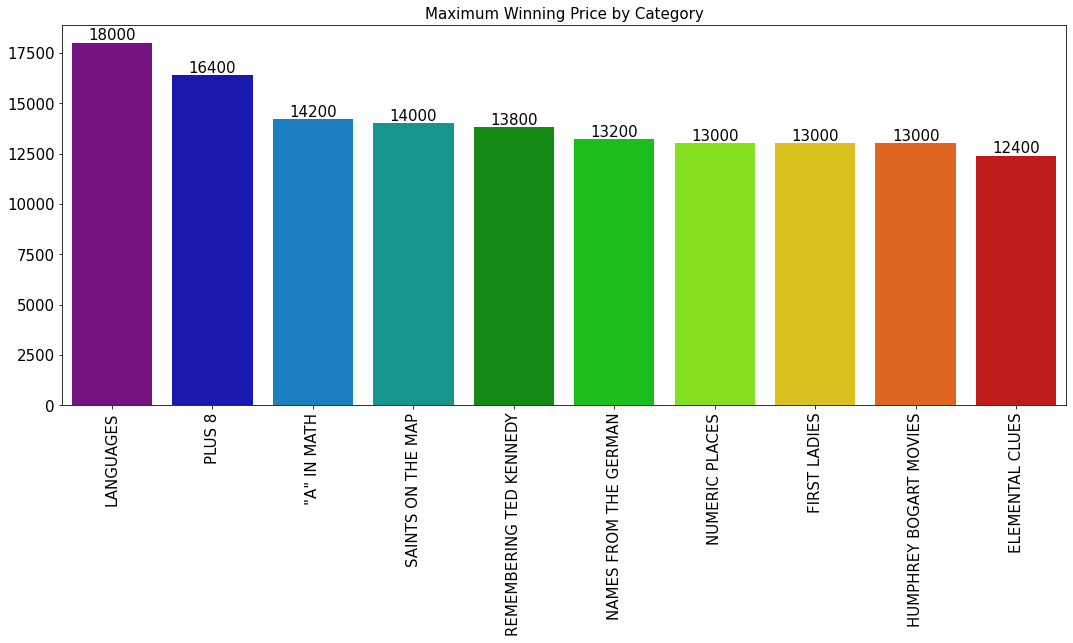

In [109]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Category", y = "Max Win Price", data = hwpc, palette = "nipy_spectral")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Maximum Winning Price by Category", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

**Average Winning Price by Category**

In [110]:
hwpca = df.groupby(["Category"])["Value"].agg(["min", "mean", "max"]).reset_index().round(2).sort_values(by = "mean", ascending = False).head(10)
hwpca.columns = ["Category", "Min Win Price", "Avg Win Price", "Max Win Price"]
hwpca

,Category,Min Win Price,Avg Win Price,Max Win Price
18288,PLUS 8,400.0,4160.0,16400.0
21411,STATE GEMS,4000.0,4000.0,4000.0
23,"""A"" SCIENCE CATEGORY",800.0,3900.0,12000.0
19328,REMEMBERING TED KENNEDY,400.0,3640.0,13800.0
15,"""A"" IN MATH",400.0,3640.0,14200.0
16220,NAMES FROM THE GERMAN,400.0,3600.0,13200.0
12018,HUMPHREY BOGART MOVIES,400.0,3560.0,13000.0
16885,NUMERIC PLACES,400.0,3480.0,13000.0
13504,JUNEAU,400.0,3360.0,12000.0
3449,ALL I WANT FOR ISTHMUS,400.0,3280.0,11600.0


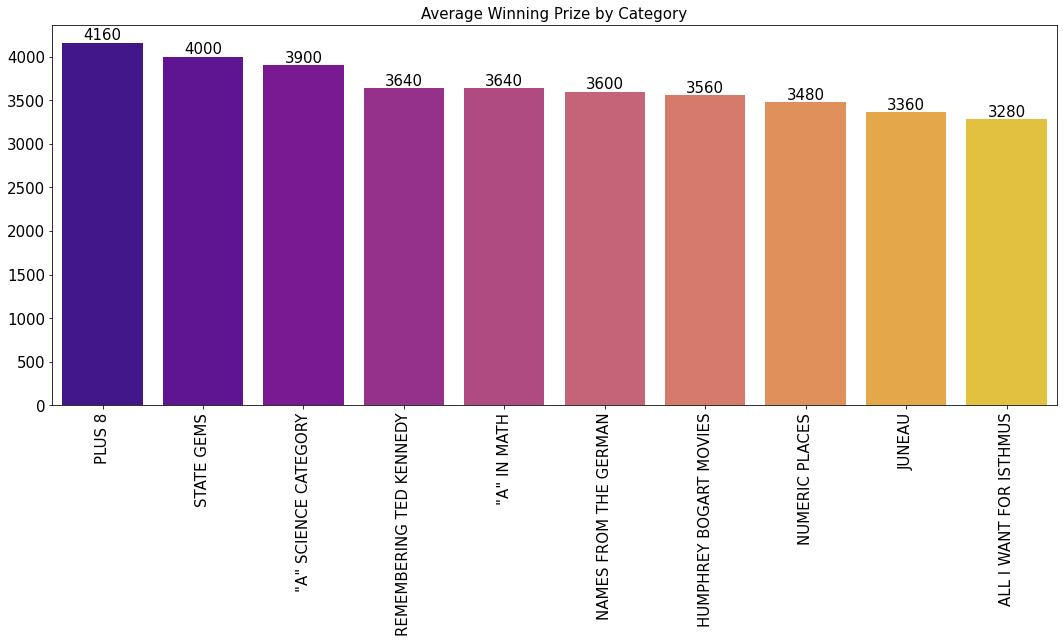

In [111]:
plt.figure(figsize = (18, 7))
graph = sns.barplot(x = "Category", y = "Avg Win Price", data = hwpca, palette = "plasma")
for p in graph.patches:
        graph.annotate('{:.0f}'.format(p.get_height()), 
                      (p.get_x()+0.4, p.get_height()),
                       ha='center', va='bottom',color= 'black', size = 15)
plt.title("Average Winning Prize by Category", size = 15)
plt.xticks(size = 15, rotation = 90)
plt.yticks(size = 15)
plt.xlabel(None)
plt.ylabel(None)
plt.show()

### Advanced Analysis

**Filtering a dataset by a list of words (King and England)**

In [25]:
def filter_data(data, words):
    filter = lambda x: all(word.lower() in x.lower() for word in words)
    return data.loc[data["Question"].apply(filter)]

In [76]:
filtered = filter_data(df, ["King", "England"])
filtered["Question"][0:5]

4953     Both England's King George V & FDR put their stamp of approval on this "King of Hobbies"              
6337     In retaliation for Viking raids, this "Unready" king of England attacks Norse areas of the Isle of Man
9191     This king of England beat the odds to trounce the French in the 1415 Battle of Agincourt              
11710    This Scotsman, the first Stuart king of England, was called "The Wisest Fool in Christendom"          
13454    It's the number that followed the last king of England named William                                  
Name: Question, dtype: object

In [27]:
# Filtering the dataset and finding the average value of those questions
filtered = filter_data(df, ["King"])
print(filtered["Value"].mean())

771.8833850722094


In [28]:
# Find the unique answers of a set of data
def get_answer_counts(data):
    return data["Answer"].value_counts()

# Testing the answer count function
print(get_answer_counts(filtered))

Henry VIII                         55
Solomon                            35
Richard III                        33
Louis XIV                          31
David                              30
                                   ..
the cooling towers                  1
1901                                1
silver                              1
"Santa Claus Is Coming To Town"     1
the (Cleveland) Cavaliers           1
Name: Answer, Length: 5268, dtype: int64


**Filtering a dataset by words (Islam)**

In [77]:
filtered_islam = filter_data(df, ["Islam"])
filtered_islam["Question"][0:5]

6831     Predominant in the Punjab, this religion has origins in both Hinduism & Islam                                        
6856     In November 1988 she was elected Prime Minister of Pakistan, becoming the first woman to head a modern Islamic nation
8650     Islamic legal opinion or directive (5)                                                                               
9283     The Khalifa clan, which has ruled Bahrain for 2 centuries, belongs to this majority branch of Islam                  
11353    In this, the top level of Islam's levels of heaven, you'll find the Most High                                        
Name: Question, dtype: object

In [85]:
# Finding Average Value of Questions related to Islam
filtered_i = filter_data(df, ["Islam"])
print(filtered_i["Value"].mean())

818.3823529411765


In [92]:
def get_answer_counts(data):
    return data["Answer"].value_counts()

# Testing the answer count function
get_answer_counts(filtered_i)[0:5]

Sunni        5
Ramadan      5
Iran         4
Medina       4
Malcolm X    3
Name: Answer, dtype: int64